In [7]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("../data/college_student_placement_dataset.csv")
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

##### Check missing value

In [15]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

#### Fix data types

In [22]:
df["Placement"] = df["Placement"].map({"Yes": 1, "No": 0})
df["Internship_Experience"] = df["Internship_Experience"].map({
    "Yes": 1,
    "No": 0
})

##### Final Verification

In [25]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  int64  
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               0 non-null      float64
dtypes: float64(3), int64(6), object(1)
memory usage: 781.4+ KB


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0
mean,99.471800,7.535673,7.532379,5.546400,0.396400,4.970900,5.561800,2.513400,NaN
std,15.053101,1.447519,1.470141,2.873477,0.489174,3.160103,2.900866,1.715959,NaN
min,41.000000,5.000000,4.540000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN
25%,89.000000,6.290000,6.290000,3.000000,0.000000,2.000000,3.000000,1.000000,NaN
50%,99.000000,7.560000,7.550000,6.000000,0.000000,5.000000,6.000000,3.000000,NaN
75%,110.000000,8.790000,8.770000,8.000000,1.000000,8.000000,8.000000,4.000000,NaN
max,158.000000,10.000000,10.460000,10.000000,1.000000,10.000000,10.000000,5.000000,NaN


In [27]:
df["College_ID"].nunique(), df.shape[0]    # unique college ids and total rows

(100, 10000)

#### EDA — Part 1: Statistical summary and distribution plots

Numeric columns: ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Internship_Experience', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed', 'Placement']


,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00
Internship_Experience,10000.0,0.396400,0.489174,0.00,0.00,0.00,1.00,1.00
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00
Placement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,median,std,q1,q3
IQ,99.00,15.053101,89.00,110.00
Prev_Sem_Result,7.56,1.447519,6.29,8.79
CGPA,7.55,1.470141,6.29,8.77
Academic_Performance,6.00,2.873477,3.00,8.00
Internship_Experience,0.00,0.489174,0.00,1.00
Extra_Curricular_Score,5.00,3.160103,2.00,8.00
Communication_Skills,6.00,2.900866,3.00,8.00
Projects_Completed,3.00,1.715959,1.00,4.00
Placement,NaN,NaN,NaN,NaN


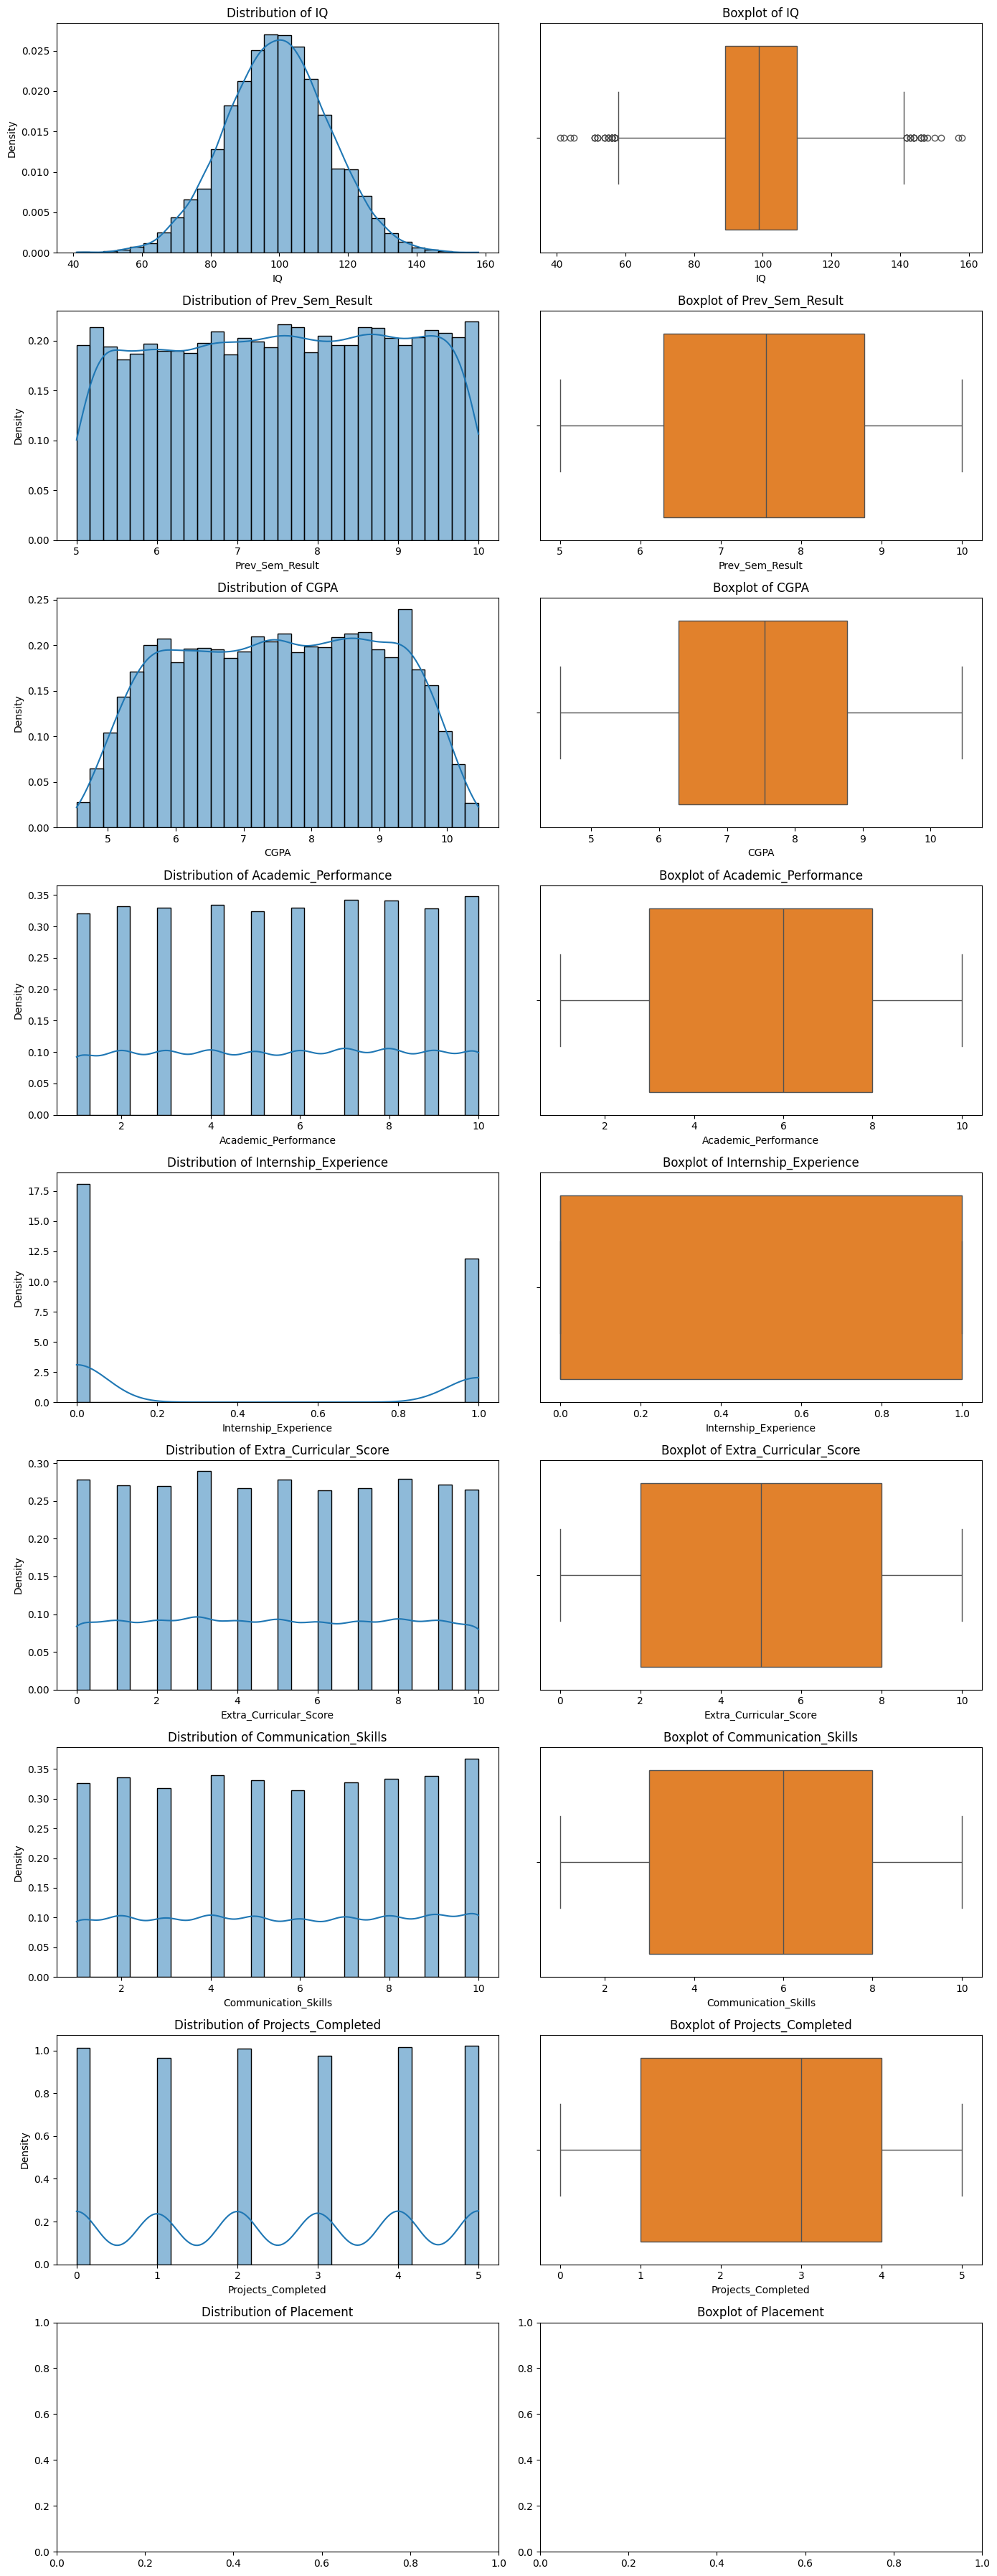

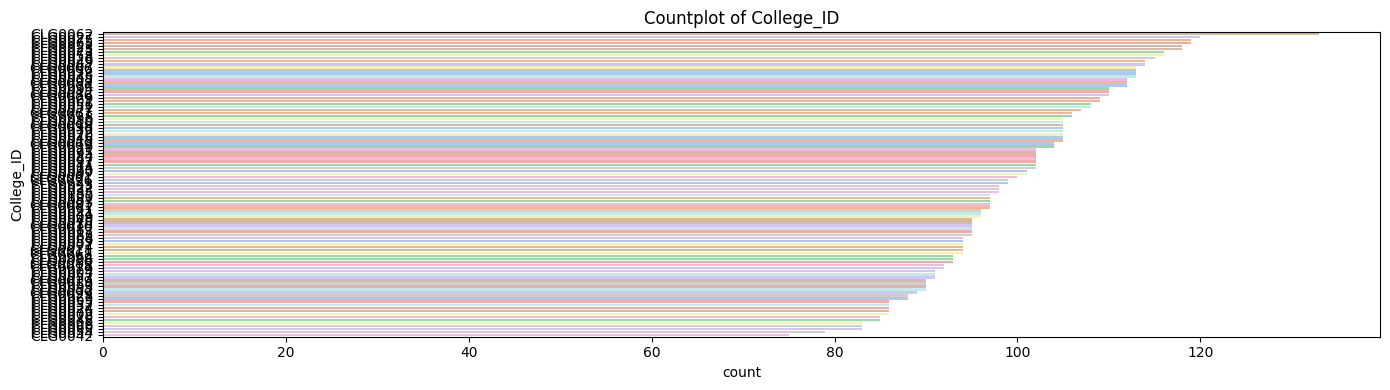

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure dataframe `df` is loaded (from previous cell)
# Select numeric columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("Numeric columns:", num_cols)

# Statistical summary (describe + median/std/quantiles)
display(df[num_cols].describe().T)
median = df[num_cols].median()
std = df[num_cols].std()
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
summary_df = pd.DataFrame({
    'median': median,
    'std': std,
    'q1': q1,
    'q3': q3
})
display(summary_df)

# Distribution plots — histogram + KDE and boxplot for each numeric column
if num_cols:
    plt.figure(figsize=(14, 4 * len(num_cols)))
    for i, col in enumerate(num_cols):
        plt.subplot(len(num_cols), 2, 2*i+1)
        sns.histplot(df[col].dropna(), kde=True, stat='density', bins=30, color='C0')
        plt.title(f"Distribution of {col}")

        plt.subplot(len(num_cols), 2, 2*i+2)
        sns.boxplot(x=df[col].dropna(), color='C1')
        plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for distribution plots.")

# Basic countplots for up to 4 categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    n = min(4, len(cat_cols))
    plt.figure(figsize=(14, 4 * n))
    for i, col in enumerate(cat_cols[:n]):
        plt.subplot(n, 1, i+1)
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, hue=col, palette='pastel', legend=False)
        plt.title(f"Countplot of {col}")
    plt.tight_layout()
    plt.show()